In [3]:
import pandas as pd
import datetime as datetime
import pprint
import os
import psycopg2
import requests
import boto3
import dotenv
from requests import get 
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs, urlunparse
from bson.json_util import dumps
from IPython.display import display, Image
from IPython.display import HTML

# An example of getting current date

currDate = datetime.datetime.now()
 
print(currDate)

2023-06-13 21:11:40.201851


In [4]:
# Load the environment variables from the .env file
dotenv.load_dotenv()

scrape_url = os.getenv('SCRAPE_URL')
# print(scrape_url)

POSTGRES_URL = os.environ.get('POSTGRES_URL')
# print(POSTGRES_URL)


In [5]:
response = requests.get(scrape_url)

# Create BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

body_tag = soup.body

# print(body_tag)

In [6]:
img_tags = soup.find_all("img")
img_tags

[<img src="//eproof.drudgereport.com/pixel.gif" style="visibility: collapse;"/>,
 <img src="https://pbs.twimg.com/media/Fyh7rHiaQAAoeNh?format=png&amp;name=small" width="350"/>,
 <img src="https://pbs.twimg.com/media/FyhuEWcaIAAcmPx?format=jpg&amp;name=small" width="500"/>,
 <img border="0" height="85" src="/i/logo9.gif" width="610"/>,
 <img src="https://pbs.twimg.com/media/Fyf0DrXXwAM9pMx?format=jpg&amp;name=small" width="200"/>,
 <img src="https://pbs.twimg.com/media/FyeNUXiaMAAxa0D?format=png&amp;name=small" width="200"/>,
 <img src="https://pbs.twimg.com/media/FyjE0VMacAAu0cD?format=jpg&amp;name=small" width="200"/>,
 <img src="https://pbs.twimg.com/media/FyjGSiJakAElHlF?format=jpg&amp;name=small" width="200"/>]

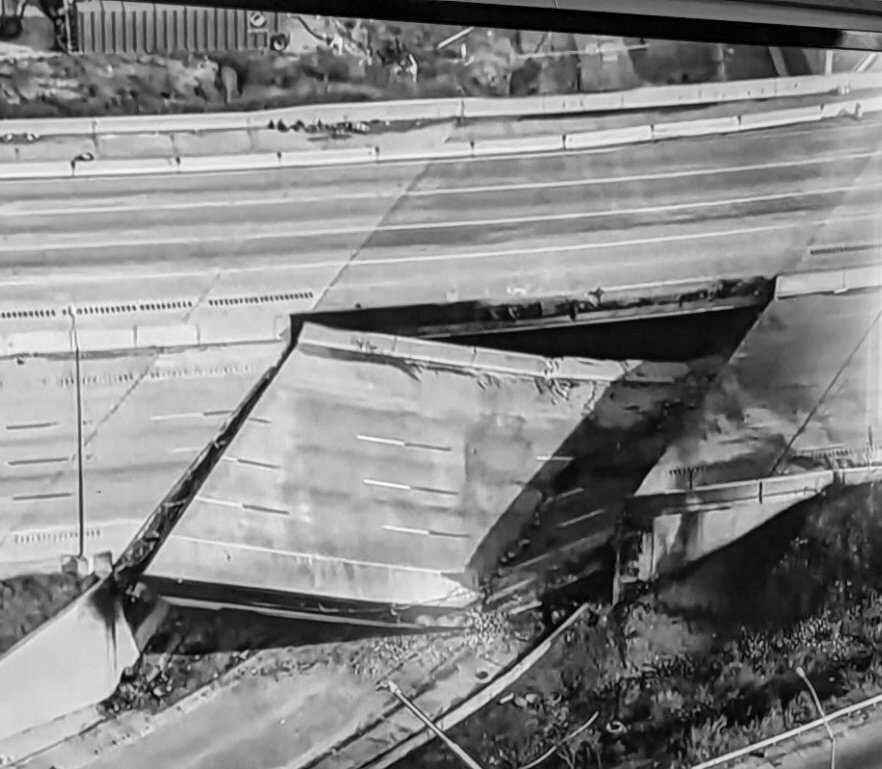

In [7]:
example_img = "https://pbs.twimg.com/media/FyV7PAEWwAADDKD.jpg"
# display(Image(example_img))
display(Image(example_img, width=200))


In [9]:
# webp file type

new_url = "https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG"
# display(Image(example_img))
from IPython.display import HTML, display

new_url_with_extension = new_url
print(new_url_with_extension)

# Generate HTML code to display the image with width set to 200 pixels
html_code = f'<img src="{new_url_with_extension}" width="200">'
print(html_code)

print("display the html image BEGIN")
display(HTML(html_code))
print("display the html image END")


https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG
<img src="https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG" width="200">
display the html image BEGIN


display the html image END


png
https://pbs.twimg.com/media/Fyh7rHiaQAAoeNh
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/Fyh7rHiaQAAoeNh', params='', query=None, fragment='')
{'format': ['png'], 'name': ['small']}
Fyh7rHiaQAAoeNh
https://pbs.twimg.com/media/Fyh7rHiaQAAoeNh.png


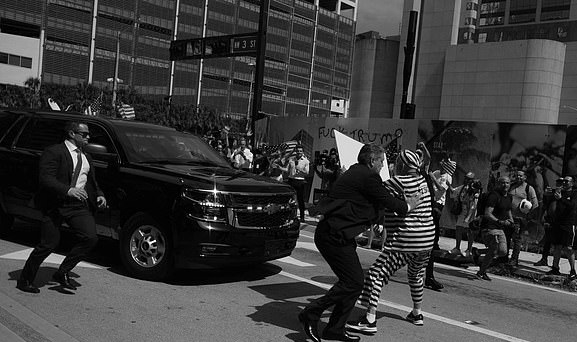

Content size of https://pbs.twimg.com/media/Fyh7rHiaQAAoeNh.png: 162006 bytes


jpg
https://pbs.twimg.com/media/FyhuEWcaIAAcmPx
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FyhuEWcaIAAcmPx', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
FyhuEWcaIAAcmPx
https://pbs.twimg.com/media/FyhuEWcaIAAcmPx.jpg


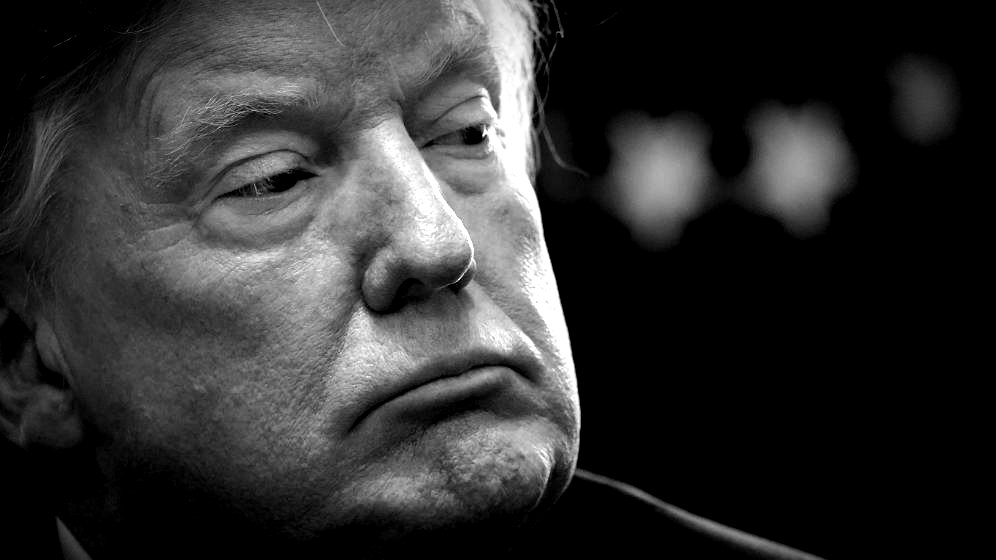

Content size of https://pbs.twimg.com/media/FyhuEWcaIAAcmPx.jpg: 50176 bytes


jpg
https://pbs.twimg.com/media/Fyf0DrXXwAM9pMx
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/Fyf0DrXXwAM9pMx', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
Fyf0DrXXwAM9pMx
https://pbs.twimg.com/media/Fyf0DrXXwAM9pMx.jpg


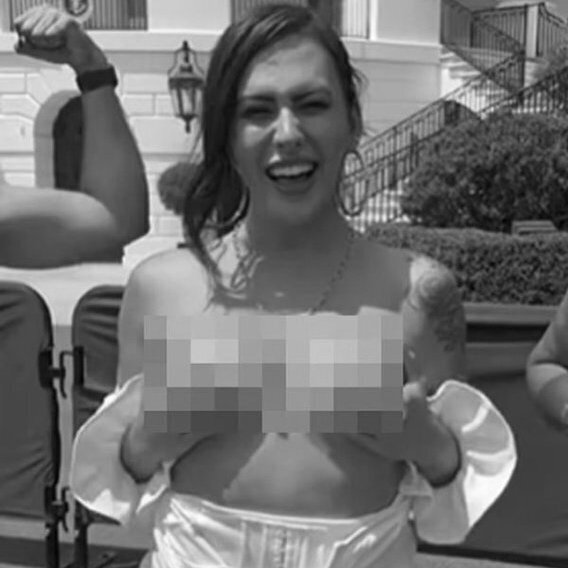

Content size of https://pbs.twimg.com/media/Fyf0DrXXwAM9pMx.jpg: 42382 bytes


png
https://pbs.twimg.com/media/FyeNUXiaMAAxa0D
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FyeNUXiaMAAxa0D', params='', query=None, fragment='')
{'format': ['png'], 'name': ['small']}
FyeNUXiaMAAxa0D
https://pbs.twimg.com/media/FyeNUXiaMAAxa0D.png


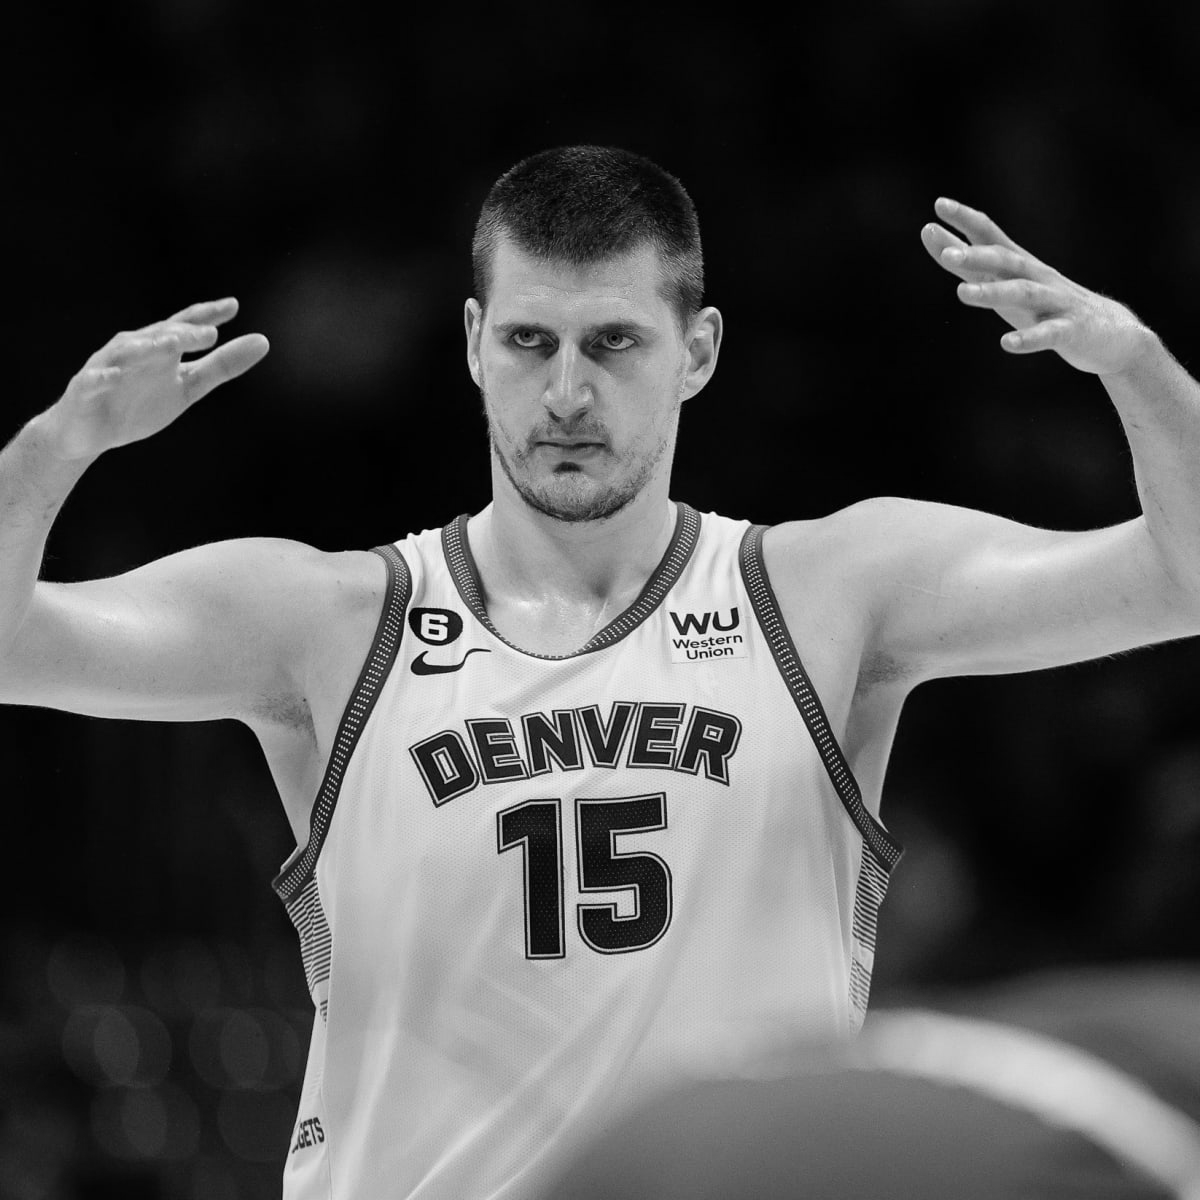

Content size of https://pbs.twimg.com/media/FyeNUXiaMAAxa0D.png: 674934 bytes


jpg
https://pbs.twimg.com/media/FyjE0VMacAAu0cD
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FyjE0VMacAAu0cD', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
FyjE0VMacAAu0cD
https://pbs.twimg.com/media/FyjE0VMacAAu0cD.jpg


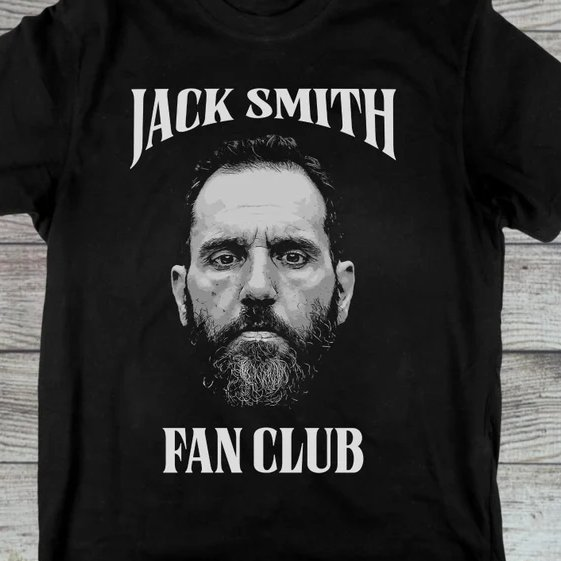

Content size of https://pbs.twimg.com/media/FyjE0VMacAAu0cD.jpg: 43663 bytes


jpg
https://pbs.twimg.com/media/FyjGSiJakAElHlF
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FyjGSiJakAElHlF', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
FyjGSiJakAElHlF
https://pbs.twimg.com/media/FyjGSiJakAElHlF.jpg


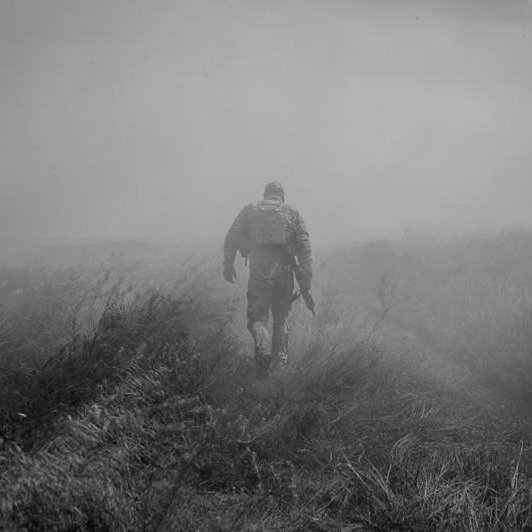

Content size of https://pbs.twimg.com/media/FyjGSiJakAElHlF.jpg: 33944 bytes




In [8]:
# import os
# from urllib.parse import urlparse, parse_qs, urlunparse

for img in img_tags:
    src = img.get("src")
    if "https" in src:
        parsed_url = urlparse(src)
        query_params = parse_qs(parsed_url.query)
        extension = query_params.get('format', [''])[0]
        filename = os.path.basename(parsed_url.path)
        filename_with_extension = f"{filename}.{extension}"
        parsed_url = parsed_url._replace(query=None)
        new_url = urlunparse(parsed_url)

        print(extension)
        print(new_url)
        print(parsed_url)
        print(query_params)
        print(filename)
        # print(new_url_with_extension)

        if len(extension) > 0:
            # print("The extension is non-empty")
            new_url_with_extension = f"{new_url}.{extension}"
            print(new_url_with_extension)
            display(Image(new_url_with_extension, width=200))
            # file_size = os.path.getsize(new_url_with_extension)
            # print(file_size)
            # Send a HEAD request to retrieve the response headers
            response = requests.head(new_url_with_extension)
            # Get the content size from the response headers
            content_size = int(response.headers.get("Content-Length", 0))
            # Print the content size
            print(f"Content size of {new_url_with_extension}: {content_size} bytes")
        else:
            print("The extension is empty, omitting extension.")
            new_url_with_extension = new_url
            print(new_url_with_extension)
            # Send a HEAD request to retrieve the response headers
            response = requests.head(new_url_with_extension)
            # Get the content size from the response headers
            content_size = int(response.headers.get("Content-Length", 0))
            # Print the content size
            print(f"Content size of {new_url_with_extension}: {content_size} bytes")
            # Generate HTML code to display the image
            html_code = f'<img src="{new_url_with_extension}" width="200">'
            print(html_code)
            print("display the html image BEGIN")
            display(HTML(html_code))
            print("display the html image END")
    

        # display(Image(new_url_with_extension, width=200))
        print("\n")

        # print(extension)
        # print(new_url)
        # print(parsed_url)
        # print(query_params)
        # print(filename)
        # print(filename_with_extension)
        # display(Image(new_url + filename_with_extension.split('&')[0], width=200))


In [23]:
import requests
from bs4 import BeautifulSoup
import psycopg2
from datetime import datetime

# Make a request to the webpage
url = "https://www.example.com"  # Replace with your desired webpage URL
response = requests.get(url)

# Create BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

# Find all the lines (within <a> tags) in the webpage
lines = soup.find_all("a")

# Connect to the PostgreSQL database
# conn = psycopg2.connect(
#     host="your_host",
#     database="your_database",
#     user="your_user",
#     password="your_password"
# )

POSTGRES_URL = os.environ.get('POSTGRES_URL')
# print(POSTGRES_URL)

# Add 'sslmode=require' to the connection URL
POSTGRES_URL += "?sslmode=require"

# print(POSTGRES_URL)

# Insert keyboard interrupt to stop the execution
raise KeyboardInterrupt

conn = psycopg2.connect(POSTGRES_URL)

cursor = conn.cursor()

# Iterate over the lines and insert/update each line into the database
for line in lines:
    line_content = line.get_text()
    line_type = "Link"
    line_url = line.get("href")
    current_datetime = datetime.now()

    if line.find("img"):
        line_type = "Image"

    # Upsert the line into the database
    query = """
        INSERT INTO your_table (line_content, line_type, line_url, first_dt, latest_dt)
        VALUES (%s, %s, %s, %s, %s)
        ON CONFLICT (line_content) DO UPDATE
        SET line_type = EXCLUDED.line_type,
            line_url = EXCLUDED.line_url,
            latest_dt = EXCLUDED.latest_dt
        WHERE your_table.latest_dt < EXCLUDED.latest_dt
    """
    data = (line_content, line_type, line_url, current_datetime, current_datetime)
    cursor.execute(query, data)

# Commit the changes and close the database connection
conn.commit()
cursor.close()
conn.close()


KeyboardInterrupt: 

In [10]:
# Find all the lines (within <a> tags) in the webpage
lines = soup.find_all("a")

# Iterate over the lines and print line number, content, and type (link or image)
for i, line in enumerate(lines, start=1):
    line_content = line.get_text()
    line_type = "Link"
    line_url = line.get("href")

    if line.find("img"):
        line_type = "Image"

    print(f"Line {i}: {line_content} [{line_type}]")
    print(f"URL: {line_url}")

Line 1: MAGA READY TO RUMBLE... [Link]
URL: https://apnews.com/article/trump-indictment-russia-justice-department-special-counsel-3e0c8e5d2ccc35fcb249f6f37f79be81
Line 2: Miami court date brings fears of violence... [Link]
URL: https://www.msn.com/en-us/news/politics/trump-s-miami-court-date-brings-fears-of-violence-rally-plans/ar-AA1cpL14
Line 3: TRUMP JUDGE TO DECIDE TRUMP FATE... [Link]
URL: https://slate.com/news-and-politics/2023/06/trump-indictment-remove-judge-aileen-cannon.html
Line 4: Recuse Herself -- or Be Forced To? [Link]
URL: https://www.newyorker.com/news/q-and-a/will-the-judge-in-trumps-case-recuse-herself-or-be-forced-to
Line 5: Aileen Cannon back in spotlight... [Link]
URL: https://www.nbcnews.com/politics/donald-trump/florida-judge-overseeing-trumps-trial-hobble-justice-departments-case-rcna88694
Line 6: WHITE HOUSE OR JAIL? [Link]
URL: https://www.semafor.com/article/06/12/2023/trumps-political-fortunes-havent-changed-but-his-legal-situation-is-getting-dark
Line 7: 

### Store the image in an S3 bucket

In [ ]:
# import requests
# import boto3

# URL of the webp image
url = "https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG"

# Send a GET request to the image URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Access the image content
    image_content = response.content

    # Store the image content in an S3 bucket
    s3 = boto3.client('s3')
    bucket_name = 'your-bucket-name'
    key = 'image.webp'  # Provide a desired key (filename) with the .webp extension
    s3.put_object(Body=image_content, Bucket=bucket_name, Key=key)

    print("Image successfully stored in S3.")

else:
    print("Failed to retrieve the image:", response.status_code)
